In [4]:
# Importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

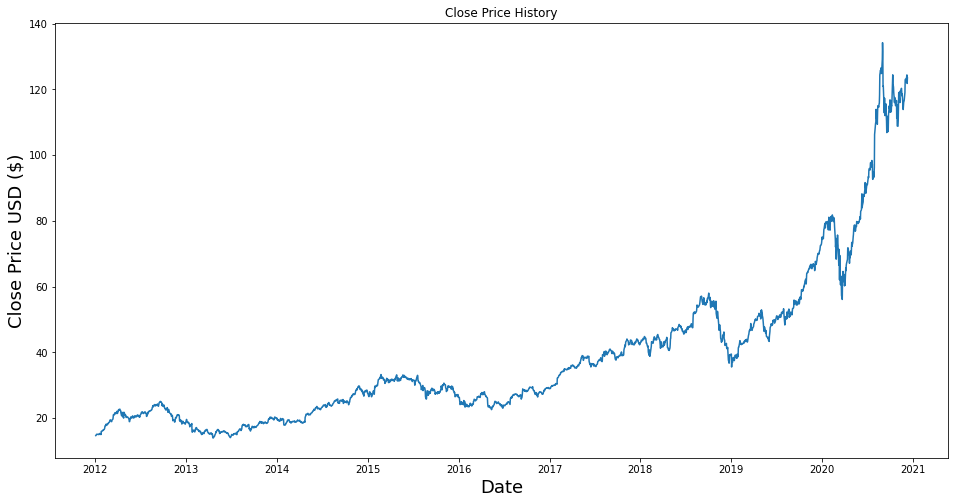

In [5]:
#Preparing the data
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-12-10')

# Show data
df

#Data size
df.shape

#Visualize the cloing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [6]:
# New dataframe with only the Close column
data = df.filter(['Close'])

#Convert the df to a np array
dataset = data.values

#Training info (20%)
tr_data_len = math.ceil(len(dataset) * .2)

In [11]:
# Good practice to apply preprocessing to input data before presenting it to a neural network

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 


In [13]:
# Create training dataset

# Create the scaled training dataset 
train_data = scaled_data[0:tr_data_len, :]

# Split the data into x_train and y_train data sets

# Indepentent
x_train = []

# Dependent
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()  

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]



In [14]:
# Convert the datasets into munpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# Reshape the data to be tridimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

391/391 [==============================] - 26s 66ms/step - loss: 1.2819e-04 0s - loss: 1.2819e-0


In [25]:
# Create the testing dataset

# Create a new array containing scaled values (test data)
test_data = scaled_data[tr_data_len - 60: , :]

x_test = []
y_test = dataset[tr_data_len: , :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [26]:
# Convert the dara to a numpy array
x_test = np.array(x_test)

In [27]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
# Evaluate the model (get the RMSE error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

print(rmse)

5.479622848298814


<ipython-input-33-7b2a95a474ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


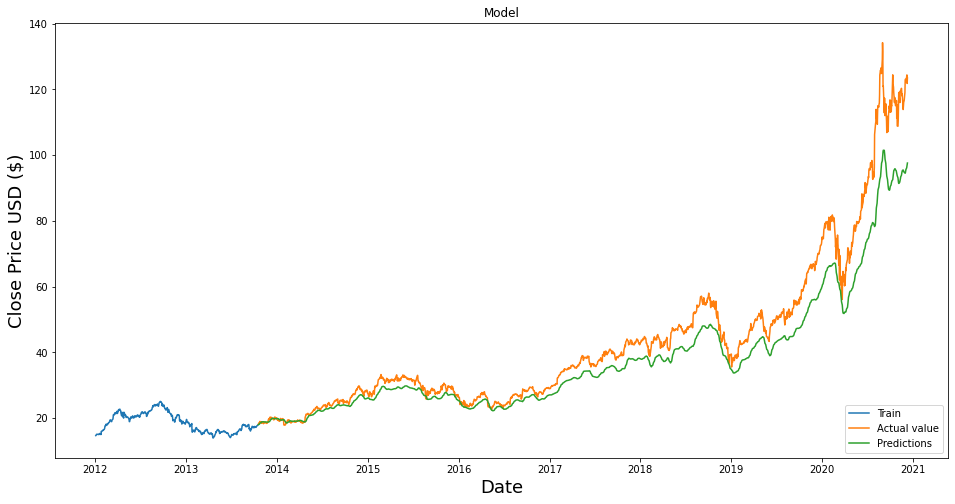

In [33]:
# Plot the data
train = data[:tr_data_len]
valid = data[tr_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual value', 'Predictions'], loc = 'lower right')
plt.show()

In [34]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2013-10-18,18.174643,18.028168
2013-10-21,18.620001,18.096905
2013-10-22,18.566786,18.190084
2013-10-23,18.748571,18.290798
2013-10-24,18.996786,18.399004
...,...,...
2020-12-04,122.250000,95.612610
2020-12-07,123.750000,96.110687
2020-12-08,124.379997,96.641159


In [41]:
# Predict the value for dec 18 2019 

# Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')

# Create a new data frame
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert to np array
X_test = np.array(X_test)

# Reshape to be 3-dimensional
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo scaling
pred_price = scaler.inverse_transform(pred_price) 

print(pred_price)

[[57.254192]]


In [42]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')

print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
